# Vectors and Transformations

## 1. Vectors
A vector is a mathematical object with both magnitude and direction. In 3D space, a vector $\mathbf{v}$ is represented as:
$$
\mathbf{v} = \begin{bmatrix} x \\ y \\ z \end{bmatrix}
$$
where $x$, $y$, and $z$ are the components along the $x$-, $y$-, and $z$-axes.

### Properties of Vectors
1. **Addition**: Two vectors $\mathbf{u}$ and $\mathbf{v}$ can be added component-wise:
   $$
   \mathbf{u} + \mathbf{v} = \begin{bmatrix} u_x \\ u_y \\ u_z \end{bmatrix} + \begin{bmatrix} v_x \\ v_y \\ v_z \end{bmatrix} = \begin{bmatrix} u_x + v_x \\ u_y + v_y \\ u_z + v_z \end{bmatrix}
   $$

2. **Scalar Multiplication**: Scaling a vector by a scalar $c$:
   $$
   c \cdot \mathbf{v} = c \cdot \begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix} c \cdot x \\ c \cdot y \\ c \cdot z \end{bmatrix}
   $$

## 2. Linear Transformations
A linear transformation can be represented by a matrix $A$. For example, scaling a vector by factors $s_x$, $s_y$, and $s_z$:
$$
A = \begin{bmatrix} s_x & 0 & 0 \\ 0 & s_y & 0 \\ 0 & 0 & s_z \end{bmatrix}, \quad T(\mathbf{v}) = A \cdot \mathbf{v}
$$

### Rotation Matrix
A rotation matrix rotates a vector around an axis. For a rotation by angle $\theta$ around the $z$-axis:
$$
A = \begin{bmatrix} \cos\theta & -\sin\theta & 0 \\ \sin\theta & \cos\theta & 0 \\ 0 & 0 & 1 \end{bmatrix}
$$

Similarly, rotations around the $x$- and $y$-axes have the matrices:

$$ A_x = \begin{bmatrix} 1 & 0 & 0 \\ 0 & \cos\theta & -\sin\theta \\ 0 & \sin\theta & \cos\theta \end{bmatrix}, \quad A_y = \begin{bmatrix} \cos\theta & 0 & \sin\theta \\ 0 & 1 & 0 \\ -\sin\theta & 0 & \cos\theta \end{bmatrix}
$$

### Reflection

A reflection transformation flips a vector across a given axis. For example, reflection across the $xy$-plane:
$$
A = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & -1 \end{bmatrix}
$$

### Shear Transformation

A shear transformation skews vectors in a particular direction:
$$
A = \begin{bmatrix} 1 & k & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}
$$
where $k$ determines the shear factor.


## Conclusion


Linear transformations provide a fundamental way to manipulate vectors in space. They can be represented using matrices and include operations like scaling, rotation, reflection, shear, and projection. Understanding these transformations is crucial in applications such as computer graphics, physics simulations, and machine learning.

## Experiment with Transformations on a Cube

Now, you can experiment with applying different transformations to a 3D cube using the following Python code. Try modifying the transformation matrix values and see how the cube changes in real-time

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from mpl_toolkits.mplot3d import Axes3D
import tkinter as tk



In [5]:
vertices = np.array([
    [0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],  # Front face (z=0)
    [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]  # Back face (z=1)
])

# Define edges connecting the vertices (12 edges in a cube)
edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),  # Front face
    (4, 5), (5, 6), (6, 7), (7, 4),  # Back face
    (0, 4), (1, 5), (2, 6), (3, 7)   # Connecting front/back
]


def apply_transformation(vertices, matrix):
    """Applies the given transformation matrix to the cube's vertices."""
    return np.dot(vertices, matrix.T)


# Function to plot the cube
def plot_cube(vertices, ax):
    ax.clear()
    for edge in edges:
        x = [vertices[edge[0], 0], vertices[edge[1], 0]]
        y = [vertices[edge[0], 1], vertices[edge[1], 1]]
        z = [vertices[edge[0], 2], vertices[edge[1], 2]]
        ax.plot3D(x, y, z, 'blue', linewidth=1)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Cube')
    ax.set_facecolor('#2a2a2a')
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])


In [6]:
def on_update(matrix_entries, ax, canvas):
    try:
        # Extract the transformation matrix from the input fields
        matrix = np.array(
            [[float(matrix_entries[0][0].get()), float(matrix_entries[0][1].get()), float(matrix_entries[0][2].get())],
             [float(matrix_entries[1][0].get()), float(matrix_entries[1][1].get()), float(matrix_entries[1][2].get())],
             [float(matrix_entries[2][0].get()), float(matrix_entries[2][1].get()), float(matrix_entries[2][2].get())]])

        # Apply the transformation to the cube's vertices
        transformed_vertices = apply_transformation(vertices, matrix)

        # Plot the transformed cube
        plot_cube(transformed_vertices, ax)
        canvas.draw()  # Redraw the canvas to update the plot

    except ValueError:
        print("Invalid matrix values")

# Set up the Tkinter window
root = tk.Tk()
root.title("3D Cube Transformation")

# Create a frame for matrix input
frame = tk.Frame(root)
frame.pack(padx=10, pady=10)

KeyboardInterrupt: 

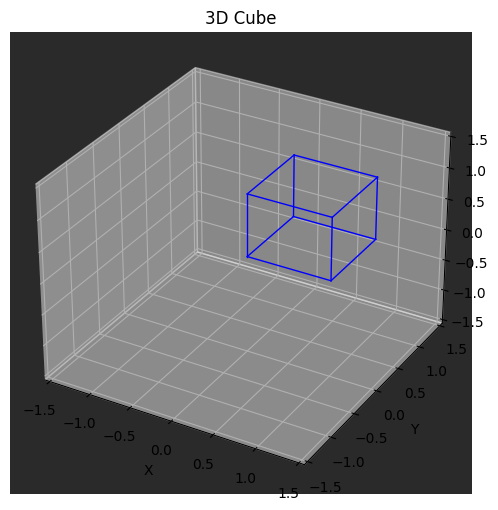

In [7]:
matrix_entries = []
for i in range(3):
    row = []
    for j in range(3):
        entry = tk.Entry(frame, width=5)
        entry.grid(row=i, column=j)
        entry.insert(0, "1" if i == j else "0")  # Default identity matrix
        entry.bind("<KeyRelease>", lambda event: on_update(matrix_entries, ax, canvas))  # Bind to KeyRelease event
        row.append(entry)
    matrix_entries.append(row)

# Create a figure and 3D axis for the plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the initial cube
plot_cube(vertices, ax)

# Embed the figure into the Tkinter window
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().pack(padx=10, pady=10)

# Run the Tkinter main loop
root.mainloop()